In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# read data frame
path = "results.csv"
df = pd.read_csv(path, sep=',')

# rename algorithms
bf_name = "Brute Force"
it_name = "Interval Tree"
df["algo"] = df["algo"].replace({"brute_force" : bf_name, "pt_interval_tree" : it_name})

# compute units
df["avg_query_ms"] = (df["queries_micro"] / df["queries"]) / 10**3
df["construction_s"] = df["construction_micro"] / 10**6

# compute means
df = df.groupby(['num_intervals', 'algo', 'p_hit', 'exp_name']).mean().reset_index()

print(df[df["algo"] == bf_name]["avg_query_ms"].sum())
print(df[df["algo"] != bf_name]["avg_query_ms"].sum())

df1 = df[df["exp_name"] == "exp1"]
df2 = df[df["exp_name"] == "exp2"]


algos = df["algo"].unique()
ps1 = df1["p_hit"].unique()
ps2 = df2["p_hit"].unique()


65.46755900000001
8.3230203


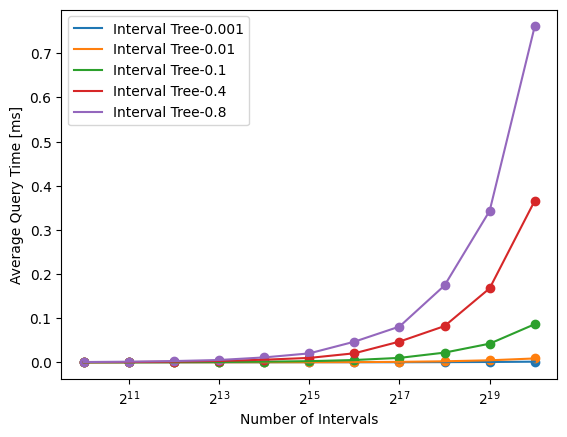

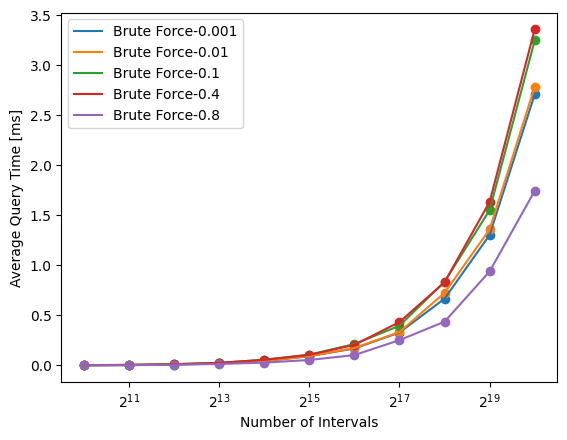

In [2]:
a = it_name
for p in ps1:
    label = a + "-" + str(p)
    df_f = df1[(df1["algo"] == a) & (df1["p_hit"] == p)]
    x = df_f["num_intervals"]
    y = df_f["avg_query_ms"]
    plt.plot(x, y, label=label)
    plt.scatter(x, y)
plt.xlabel('Number of Intervals')
plt.ylabel('Average Query Time [ms]')
plt.xscale("log", base=2)
plt.legend()
plt.savefig('query_by_n_it.png', dpi=300, bbox_inches="tight")
plt.show()

a = bf_name
for p in ps1:
    label = a + "-" + str(p)
    df_f = df1[(df1["algo"] == a) & (df1["p_hit"] == p)]
    x = df_f["num_intervals"]
    y = df_f["avg_query_ms"]
    plt.plot(x, y, label=label)
    plt.scatter(x, y)
plt.xlabel('Number of Intervals')
plt.ylabel('Average Query Time [ms]')
plt.xscale("log", base=2)
plt.legend()
plt.savefig('query_by_n_bf.png', dpi=300, bbox_inches="tight")
plt.show()

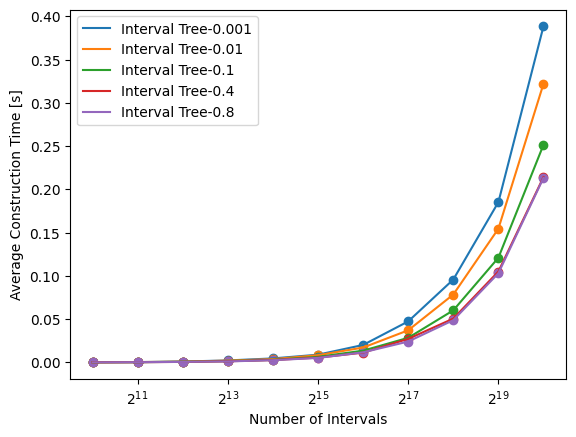

In [3]:
a = it_name
for p in ps1:
    label = a + "-" + str(p)
    df_f = df1[(df1["algo"] == a) & (df1["p_hit"] == p)]
    x = df_f["num_intervals"]
    y = df_f["construction_s"]
    plt.plot(x, y, label=label)
    plt.scatter(x, y)

plt.xlabel('Number of Intervals')
plt.ylabel('Average Construction Time [s]')
plt.xscale('log', base=2)
plt.legend()
plt.savefig('construction.png', dpi=300, bbox_inches="tight")
plt.show()

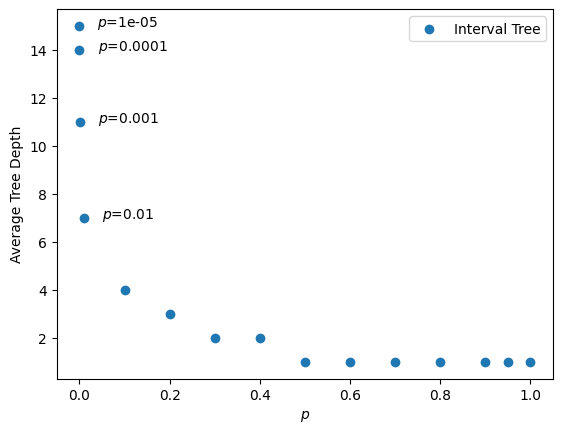

In [4]:
a = it_name
label = a
df_f = df2[(df2["algo"] == a)]
x = df_f["p_hit"].reset_index(drop=True)
y = df_f["depth"].reset_index(drop=True)
plt.scatter(x, y, label=label)
plt.xlabel('$p$')
plt.ylabel('Average Tree Depth')

for i in range(4):
    plt.text(x[i] + 0.04, y[i], f"$p$={x[i]}")

plt.legend()
plt.savefig('tree_depth.png', dpi=300, bbox_inches="tight")
plt.show()


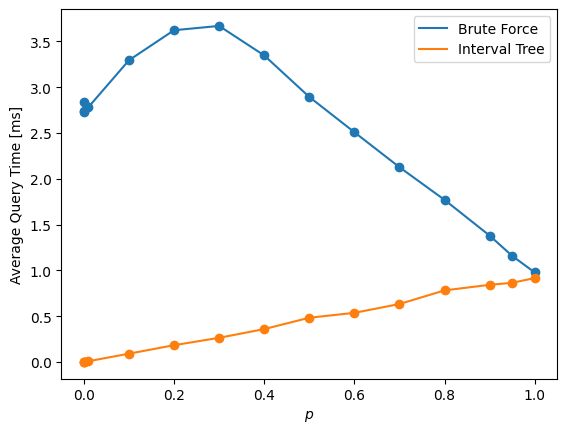

In [5]:
n = 2**20
for a in algos:
    label = a
    df_f = df2[(df2["algo"] == a) & (df2["num_intervals"] == n)]
    x = df_f["p_hit"]
    y = df_f["avg_query_ms"]
    plt.plot(x, y, label=label)
    plt.scatter(x, y)

plt.xlabel('$p$')
plt.ylabel('Average Query Time [ms]')
plt.legend()
plt.savefig('query_by_p.png', dpi=300, bbox_inches="tight")
plt.show()

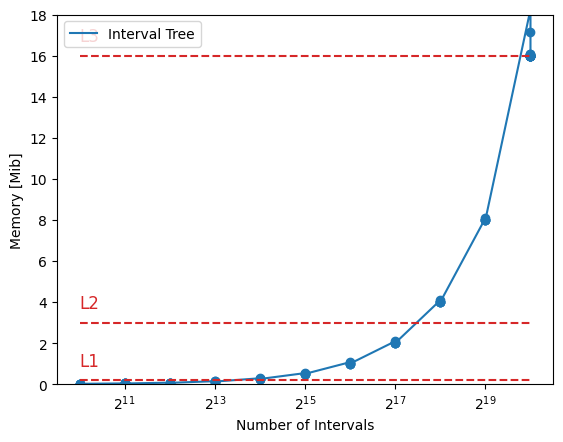

In [6]:
a = it_name
label = a
cache_sizes = [0.1914063, 3, 16]
cache_name = ["L1", "L2", "L3"]
df_f = df[(df["algo"] == a)]
x = df_f["num_intervals"]
y = df_f["memory_bytes"] * 9.5367431640625e-7
plt.plot(x, y, label=label)
plt.scatter(x, y)
plt.hlines(y=cache_sizes, linestyles='dashed', xmin=2**10, xmax=2**20, colors="tab:red")

for i in range(3):
    plt.text(2**10, cache_sizes[i] + 0.7, cache_name[i], fontsize=12, color="tab:red")

plt.xlabel('Number of Intervals')
plt.ylabel('Memory [Mib]')
plt.ylim([0, 18])
plt.xscale("log", base=2)
plt.legend()
# plt.savefig('memory.png', dpi=300, bbox_inches="tight")
plt.show()
